In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist
from urllib2 import Request, urlopen
import json
from datetime import date, datetime
import matplotlib.dates as mdates
import ast
import os.path
from glob import glob
from datetime import datetime
import pytz
import difflib
from collections import OrderedDict

In [2]:
#Data will not include channels that are restricted to only admins for posting privilidges
ChannelName = "CentipedeCentral2018"
#For now, just include all json files
file_name = "NewCentipedeCentral"
data = []
pattern = os.path.join(file_name + '/', '*.json')
for file_name in glob(pattern):
    #print file_name
    data.append(json.load(open(file_name)))


In [3]:
#Reading data through

#Message data
messageData = []


#UID associated with name
"""
      "UID": {
        "name": Name
      },
"""
userList = []

#List of UIDs. Index if mentioned in 'u' in messages
"""
Ex:
      "384741477567430657": {
        "u": 13,
        "t": 1511799916403,
        "m": "https://i.imgur.com/Jud77MH.png",
        "e": [
          {
            "url": "https://imgur.com/Jud77MH",
            "type": "image"
          }
        ]
      },
"""
userIndex = []


#Channel Info
"""
      "UID of Channel": {
        "server": _IndexNumber_,
        "name": Name
      }
"""
channelInfo = []

In [4]:
for item in data:
    for majorkey, subdict in item.iteritems():
        if majorkey == "data":
            messageData.append(subdict)

        if majorkey == "meta":
            for majorkey2, subdict2 in subdict.iteritems():
                if majorkey2 == "users":
                    userList.append(subdict2)
                if majorkey2 == "userindex":
                    userIndex.append(subdict2)
                if majorkey2 == "servers":
                    channelInfo.append(subdict2)

#print messageData



In [5]:
#Timestamps are in epoch time
timestamps = []
message = []
messageID = []
author = []

#author ID = index associated with userIndex
authorID = []
authorName = []

#Not a priority RN but collect anyways
imageData = []

#Convert lists to dictionaries
"""messageData2 = json.dumps(messageData)[0]
userList2 = json.dumps(userList)[0]
userIndex2 = json.dumps(userIndex)[0]
channelInfo2 = json.dumps(channelInfo)[0]

messageData3 = json.dumps(messageData)
userList3 = json.dumps(userList)
userIndex3 = json.dumps(userIndex)
channelInfo3 = json.dumps(channelInfo)

messageData4 = ast.literal_eval(messageData3)
userList4 = ast.literal_eval(userList3)
userIndex4 = ast.literal_eval(userIndex3)
channelInfo4 = ast.literal_eval(channelInfo3)"""

'messageData2 = json.dumps(messageData)[0]\nuserList2 = json.dumps(userList)[0]\nuserIndex2 = json.dumps(userIndex)[0]\nchannelInfo2 = json.dumps(channelInfo)[0]\n\nmessageData3 = json.dumps(messageData)\nuserList3 = json.dumps(userList)\nuserIndex3 = json.dumps(userIndex)\nchannelInfo3 = json.dumps(channelInfo)\n\nmessageData4 = ast.literal_eval(messageData3)\nuserList4 = ast.literal_eval(userList3)\nuserIndex4 = ast.literal_eval(userIndex3)\nchannelInfo4 = ast.literal_eval(channelInfo3)'

In [6]:
#Analyze message data
#print type(messageData4)

#Get message, userIndex, timestamp, and image data
for a in messageData:   
    for b in a:

        for c in a[b]:
            temp = a[b][c]
            #print type(a[b][c])
            messageID.append(c)
            for key, value in temp.iteritems():
                if key == "m": 
                    message.append(value)
                if key == "u":
                    authorID.append(value)
                if key == "t":
                    timestamps.append(value)
                if key =="e":
                    imageData.append(value)
            """for d in a[b][c]:
                print a[b][c]
                #print d
                #temp = map(str, d)
                #print type(temp)
                #print temp[2]
                #if temp == 'm':

                """
            

        #authorID.append(userList)

print "Number of messages: " + str(len(message))
print len(authorID)
print len(timestamps)

print len(messageID)
            
"""for key, value in messageData.iteritems():
    for key2, value2 in messageData.iteritems():
        print key2"""

Number of messages: 26126
26126
26126
26126


'for key, value in messageData.iteritems():\n    for key2, value2 in messageData.iteritems():\n        print key2'

In [7]:
#Map user ID to real name
"""print type(userList)
print userList"""
"""print userIndex
print type(userIndex)"""
userIndex2 = []
authorName = []
realIDs = []
time_referential = []
firstpost = []

for i in userIndex:
    userIndex2 = userIndex2 + i
print len(userIndex2)
userList2 =[]

for i in userList:
    userList2 = dict(userList2, **i)

print len(userList2)

"""#Match first_date of post with index of authorName
for index in userIndex2:
    timestamps2 = []
    authorID2 = []
    message2 = []
    realID = index
    #Search for first post:
    minValue = 9999999999
    for a in messageData:   
        for b in a:
            for c in a[b]:
                temp = a[b][c]
                #print type(a[b][c])
                for key, value in temp.iteritems():
                    if key == "m": 
                        message2.append(value)
                    if key == "u":
                        authorID2.append(value)
                    if key == "t":
                        timestamps2.append(value)
                        if value < min:
                            minValue = value
    for 
    time_referential.append()"""

#Find name associated with ID
for index in authorID:
    #print index
    realID = userIndex2[index]
    realIDs.append(realID)
    #print realID
    #print userList2[realID]
    authorName.append(userList2[realID]["name"])
    #firstpost.append(time_referential[index])
    
#Note there are repeats in authorName so that you can directly associate it with the correct message_____

print len(authorName)




#From first data set. Should be bigger when all json files are added together
"""30300
30300
30300"""

738
485
26126


'30300\n30300\n30300'

In [9]:
print "Number of users: " + str(len(userList2))

Number of users: 485


2017-09-28 23:01:02.743000
2018-01-15 18:24:30.176000
                         count
Date                          
2017-10-01 01:12:20.013      1
2017-10-09 05:37:21.899      1
2017-09-30 00:49:31.302      1
2017-10-09 19:08:21.002      1
2017-10-22 06:34:21.770      1
2017-12-04 05:15:57.415      1
2017-09-30 07:40:49.355      1
2017-09-29 23:41:39.087      1
2017-10-09 08:36:40.633      1
2018-01-06 19:52:39.752      1
2017-10-09 18:57:17.548      1
2017-10-14 03:54:12.874      1
2017-10-06 03:11:30.033      1
2017-10-04 13:33:33.034      1
2017-09-29 23:57:34.694      1
2017-10-09 03:29:13.453      1
2017-10-10 11:29:38.734      1
2017-10-09 02:47:59.943      1
2017-10-10 01:43:57.848      1
2017-12-08 20:11:46.673      1
2017-11-06 12:35:47.397      1
2017-09-30 01:11:42.103      1
2017-09-29 00:48:32.789      1
2017-11-23 00:35:55.155      1
2017-10-30 13:12:02.991      1
2017-10-08 20:58:09.551      1
2017-11-23 01:33:06.967      1
2017-09-30 03:14:31.322      1
2017-11-02 05:34

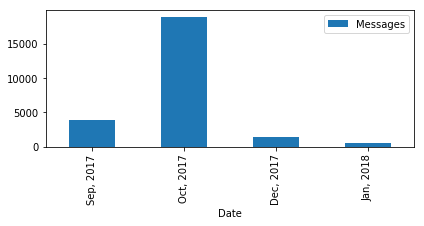

In [9]:
#Timeseries for amount of messages
#Taking out the first ___ rows since messages weren't collected at that time. 

df = pd.DataFrame({'Date':timestamps})
df['count'] = 1
#print df

#Convert timestamps after pandas https://stackoverflow.com/a/34669712/4698963

#Count per month
df['Date'] = pd.to_datetime(df['Date'],unit='ms')
df.index = df['Date']
del df['Date']
print df.index.min()
print df.index.max()

print df

#Find Max + Reset Index (so that I can reassign column names)
gb = df.groupby([(df.index.year),(df.index.month)]).sum().reset_index()
gb.columns = ["Year", "Month", "Messages"]
gb['Date'] = gb[['Year', 'Month']].apply(lambda x: '-'.join(x.astype(str)), axis=1)
gb['Date'] = pd.to_datetime(gb['Date'])
del gb['Year']
del gb['Month']
gb = gb.reindex(columns=["Date", "Messages"])

#Remove November Data for consistency:
gb = gb[(gb['Date'].dt.year != 2017) | (gb['Date'].dt.month != 11)]

ax = gb.set_index('Date').plot(kind='bar')
plt.tight_layout()
ax.set_xticklabels(gb['Date'].dt.strftime('%b, %Y'))
retweets = ax
retweetsImage = retweets.get_figure()
retweetsImage.savefig(ChannelName + 'MessagesBar_Month.png')



In [11]:
#input list of hatewords from text file
listofHatewords = json.load(open('listofhatewords.json'))
print len(listofHatewords)

1000


In [29]:
#Check hate word frequency



#Use ntlk and hatelibrary
#http://www.nltk.org/book/ch01.html
#hatelibrary sign up for API: https://www.hatebase.org/login_register/registration_success
#a29261266be5f2798d7d08bac9bb70d6
#Daily Limit = 100 <=
#But I can always get a new key

#Do ntlk stuff after

#Two types of graphs: one for frequency among all words and frequency among all posts.

#NOTE
"""
If you publish work that uses NLTK, please cite the NLTK book as follows:

Bird, Steven, Edward Loper and Ewan Klein (2009), Natural Language Processing with Python. O’Reilly Media Inc.
"""


#print data
#print listofHatewords
#print len(listofHatewords)
#print listofHatewords

"""#test difflib

test123 = "dyke d*ke dy*e dnke"

test123 = test123.split(" ")

print difflib.get_close_matches("dyke", test123, 10, .75)"""

#python wrapper : https://github.com/DanielJDufour/hatebase

#Message is equal to each other

#print len(message)
#initiate lists to set length
frequency = []
versionsOfWord = []
#frequencyID = []
frequencyTime = []
#Index of original message list
listmessageID = []
listauthors = []
frequencyIndex = []
for x in range(0, 1000):
    frequency.append(0)

"""
for x in range(0, 1000):
    frequencyID.append([])
"""
for x in range(0, 1000):
    listmessageID.append([])
for x in range(0, 1000):
    listauthors.append([])

for x in range(0, 1000):
    frequencyTime.append([])
for x in range(0, 1000):
    frequencyIndex.append([])
    
for x in range(0, 1000):
    versionsOfWord.append([])

#NTLK 
#FROM: https://stackoverflow.com/a/45158719/4698963
from nltk.corpus import wordnet as wn
#We'll store the derivational forms in a set to eliminate duplicates
index2 = 0
for word in listofHatewords:
    forms = set()
    for happy_lemma in wn.lemmas(word): #for each "happy" lemma in WordNet
        forms.add(happy_lemma.name()) #add the lemma itself
        for related_lemma in happy_lemma.derivationally_related_forms(): #for each related lemma
            forms.add(related_lemma.name()) #add the related lemma
        versionsOfWord[index2] = forms
    index2 += 1
print len(versionsOfWord)

"""#Measure time of loop
import time
start = time.clock() """

#old code
#Time for 254776 messages: 3323.288668 seconds
#Time for all 2979089 result minimum: 10.7942016982 hours

#new code
#Time for 1000 messages: 13.301362 seconds
#Time for 2979089 messages: 11.007205894227 hours

#new new code
#Time for 1000 messages: 11.202224 second
#Time for 2979089 messages: 9.2701173038712 hours
    
totalNumberofWords = 0
counter = 0
print len(message)
print len(messageID)
print len(timestamps)
for m, m_id, date, a_id in zip(message, messageID, timestamps, authorID):
    #print m
    totalNumberofWords += len(m)
    lower = m.lower()
    index = 0

    
    
    if counter%100000==0:
        print counter
    #print counter
    #Need to tokenize to get all frequencies
    for word in listofHatewords:
        wordLowered = word.lower()
        listof_lower = lower.split(" ")
        similarWords = versionsOfWord[index]

        #matchesHate = difflib.get_close_matches(word, listof_lower, 1, .5)
        #https://docs.python.org/2/library/difflib.html
        #Else if check the NTLK forms of words
        #Check if there are versions of the word first though
        #TOOK out "word in lower" since it was inaccurate
        if wordLowered in listof_lower or len(difflib.get_close_matches(wordLowered, listof_lower, 1, .75)) >= 1:
            frequency[index]+=1
            frequencyIndex[index].append(counter)
            #frequencyID[index].append(str(m_id) + " " + m)
            frequencyTime[index].append(date)
            listmessageID[index].append(m_id)
            listauthors[index].append(a_id)
        elif len(similarWords) > 0:
            #found = False
            for a in similarWords:
                aLowered = a.lower()
                if aLowered in listof_lower or len(difflib.get_close_matches(aLowered, listof_lower, 1, .75)) >= 1:
                    #found = True
                    frequency[index]+=1
                    frequencyIndex[index].append(counter)
                    #frequencyID[index].append(str(m_id) + " " + m)
                    frequencyTime[index].append(date)
                    listmessageID[index].append(m_id)
                    listauthors[index].append(a_id)
                    #print "test" + str(counter)
                    break 
        #Increase index to make sense
        if index >= len(listofHatewords):
            print "Length error"
        
        index+=1
    counter += 1

#check asterisk. 
#Get list of words
#Use difflib library => get_close_matches of words. Cutoff value
#Use NTLK
#Think about software filtering methods

print "All Done" + str(len(message))
#print frequency



#Total mentions of words in posts
#=>Treats each word in every post as equal<=

#Process data
jsonList = []

for i in range(0,1000):
    jsonList.append({'hateword': listofHatewords[i], 'messageID': listmessageID[i], 'authorID':listauthors[i], 'frequency': frequency[i], 'frequencyIndex':frequencyIndex[i], 'frequencyTime':frequencyTime[i]})
    
#print(json.dumps(jsonList, indent = 1))

#Put to file
import simplejson
import time
timestr = time.strftime("%Y%m%d-%H%M%S")
try:
    f = open(ChannelName + 'Allfrequencies'  + str(timestr) +'.json', 'w')
    simplejson.dump(jsonList, f)
    f.close()
except NameError:
    print "Almost erased" + ChannelName + "Allfrequencies.json! Be careful!!!"

1000
26126
26126
26126
0
All Done26126


In [ ]:
#Store frequency
#output list of hate words into text file
#DON'T RUN
import simplejson
frequency = [68, 57, 516, 544, 595, 304, 1198, 0, 0, 3664, 3940, 713, 2717, 3262, 1991, 3649, 45, 667, 77, 2565, 239, 1434, 747, 498, 799, 51, 1963, 3408, 17, 238, 45, 387, 615, 512, 266, 2902, 1143, 121, 629, 1943, 2599, 306, 1219, 6522, 2371, 791, 1011, 2902, 2016, 1221, 62, 108, 35, 138, 450, 36, 1530, 4463, 718, 23, 735, 915, 957, 774, 594, 501, 513, 471, 645, 39, 1194, 214, 207, 1000, 127, 301, 778, 662, 537, 359, 427, 6113, 48, 3078, 417, 988, 768, 817, 2999, 3284, 2175, 959, 996, 1912, 508, 872, 5507, 2679, 6238, 592, 537, 326, 396, 2516, 1214, 910, 762, 377, 4509, 2350, 1876, 297, 46, 171, 389, 3633, 1934, 533, 1100, 3151, 1924, 2404, 1006, 74, 3187, 2972, 2591, 1568, 2601, 3129, 91, 62, 56, 239, 1216, 2249, 1765, 236, 644, 128, 1062, 733, 252, 2456, 1820, 1365, 2117, 767, 1329, 1683, 297, 29, 998, 1660, 3170, 23, 3128, 1795, 58, 99, 3813, 1837, 1789, 1374, 638, 1001, 3018, 614, 7, 277, 825, 773, 1961, 444, 1663, 221, 50, 594, 193, 289, 124, 1579, 831, 145, 83, 1744, 439, 611, 1550, 966, 1568, 779, 93, 111, 318, 5443, 1272, 816, 1352, 2809, 2289, 3178, 1132, 3360, 2140, 2814, 3010, 2717, 2501, 1230, 3789, 3291, 176, 2430, 0, 2037, 840, 4644, 4367, 24, 847, 263, 4093, 1874, 1282, 217, 915, 14, 326, 305, 610, 3100, 31, 2853, 94, 743, 910, 2507, 2352, 3993, 219, 1688, 787, 1506, 666, 331, 1393, 1066, 1537, 886, 232, 549, 726, 462, 2208, 1964, 175, 498, 1180, 8, 650, 1809, 2361, 2620, 493, 85, 2214, 3349, 457, 146, 397, 51, 2321, 1101, 3628, 386, 1924, 766, 18, 16, 3480, 45, 98, 133, 1401, 2058, 2749, 664, 2250, 2537, 2026, 179, 2091, 2483, 962, 766, 545, 4859, 617, 3454, 283, 2114, 3584, 633, 4150, 3977, 182, 3464, 389, 3113, 4177, 166, 430, 2820, 59, 522, 901, 835, 697, 861, 3594, 364, 409, 1428, 2623, 1494, 2614, 1284, 64, 1931, 1546, 669, 2284, 427, 556, 40, 4945, 161, 2461, 1734, 1371, 362, 3585, 40, 1, 4634, 1944, 1887, 639, 1615, 6, 6065, 1638, 2279, 1248, 0, 814, 3027, 2000, 1295, 361, 287, 169, 687, 1311, 3114, 180, 4434, 909, 4916, 225, 2980, 3295, 418, 705, 1196, 1382, 629, 764, 2097, 1951, 630, 1788, 755, 593, 3348, 2402, 1987, 2759, 740, 2553, 2828, 3761, 2358, 195, 1135, 16, 1063, 637, 1974, 2036, 1244, 1575, 2612, 388, 336, 40, 1127, 1194, 3978, 1195, 668, 3334, 602, 2448, 422, 769, 2634, 1991, 494, 4135, 831, 468, 1018, 1372, 493, 234, 3807, 6321, 263, 1842, 2451, 299, 3049, 5939, 4797, 5527, 3921, 463, 3494, 2423, 267, 68, 6834, 6838, 239, 867, 3036, 3279, 2936, 1114, 505, 2472, 6266, 282, 1078, 997, 542, 375, 286, 758, 2858, 590, 5068, 208, 573, 4321, 5321, 3013, 783, 815, 3732, 4531, 707, 218, 3653, 4727, 111, 4474, 1084, 240, 4437, 434, 317, 243, 836, 1831, 4204, 4440, 3967, 5073, 2043, 740, 1906, 2772, 1997, 4508, 2829, 1790, 1832, 751, 1098, 205, 5235, 2156, 4065, 294, 2850, 2374, 1617, 1052, 3450, 723, 329, 532, 527, 411, 393, 550, 778, 28, 76, 2061, 3, 1466, 1112, 558, 224, 2005, 1921, 441, 125, 101, 98, 261, 2196, 600, 734, 435, 363, 1383, 1861, 616, 1875, 1565, 1676, 137, 78, 434, 433, 24, 1537, 1274, 1784, 399, 3331, 78, 3015, 334, 546, 537, 7, 2707, 333, 548, 882, 1646, 66, 663, 146, 111, 335, 1781, 387, 327, 413, 1088, 1401, 2058, 9, 21, 627, 813, 366, 7, 1941, 1665, 603, 1167, 296, 2078, 776, 1091, 1108, 5243, 2103, 293, 168, 214, 1500, 3222, 2835, 274, 367, 818, 655, 241, 2436, 632, 56, 1192, 207, 198, 1702, 2807, 3393, 2459, 1491, 1142, 4239, 3730, 1525, 450, 1487, 3242, 23, 90, 149, 4420, 4087, 1701, 1202, 880, 1179, 1274, 775, 3459, 1583, 2049, 4202, 1096, 1941, 3287, 2154, 868, 859, 639, 1317, 1738, 1659, 870, 762, 575, 3062, 3571, 1348, 3136, 2478, 453, 4190, 4857, 5177, 2416, 382, 421, 933, 687, 622, 2212, 2688, 1167, 957, 2606, 4474, 1326, 5212, 4724, 156, 3916, 289, 2503, 799, 1904, 209, 1020, 2049, 1801, 83, 4992, 1093, 558, 1186, 4760, 392, 331, 3323, 1471, 528, 850, 1031, 689, 1476, 693, 1462, 197, 224, 1310, 1236, 2010, 1683, 1221, 134, 4463, 173, 214, 5563, 94, 1627, 1663, 1910, 2418, 3263, 1666, 462, 1315, 1603, 1860, 2076, 1432, 1778, 352, 1101, 665, 180, 209, 3204, 402, 225, 2388, 3838, 3103, 62, 20, 55, 1155, 353, 896, 97, 73, 940, 2729, 2671, 4700, 3440, 564, 1619, 1556, 1864, 323, 1752, 139, 1392, 1381, 895, 1497, 2497, 2290, 191, 103, 55, 343, 89, 632, 356, 3276, 1037, 2313, 1348, 1656, 1395, 2687, 1133, 1526, 150, 172, 4184, 2403, 274, 113, 2959, 2215, 1969, 519, 216, 4640, 172, 2131, 1848, 3426, 1848, 2818, 1869, 2462, 161, 1234, 1598, 312, 2098, 247, 1746, 2379, 1505, 218, 2649, 946, 2105, 2305, 1349, 3308, 2899, 8156, 2756, 2344, 880, 6050, 121, 5524, 729, 1899, 3553, 775, 3552, 3204, 7936, 6947, 3285, 656, 841, 1706, 3176, 663, 2495, 60, 56, 24, 1200, 1777, 3651, 1824, 80, 397, 140, 173, 308, 1801, 1230, 4047, 892, 4292, 4830, 2934, 1023, 1709, 1632, 926, 337, 100, 60, 5374, 508, 1156, 48, 5265, 5275, 1710, 457, 352, 3589, 2231, 1509, 227, 1859, 1721, 274, 1050, 204, 2089, 1528, 906, 1079, 1888, 2331, 2084, 1228, 1548, 599, 419, 1365, 3813, 692, 126, 280, 407, 560, 954, 1560, 173, 117, 291, 797, 982, 1838, 1210, 1405, 7770, 2297, 2508, 379, 404, 853, 3552, 4058, 656, 434, 2146, 379, 1664, 4602, 2189, 2436, 1400, 426, 933, 1526, 341, 4534, 202, 2905, 1865, 1172, 4572, 3523, 1487, 601, 979, 0, 190, 8, 148, 1973, 4768, 367, 2430, 321, 350, 3202, 201, 3977, 4700, 1690, 443, 1604, 679, 1838, 1803, 2363, 1402, 1323, 187, 36, 1, 306, 194, 19, 642, 155, 0, 1741, 226, 520, 283, 2151, 1074, 102, 3074, 567, 1016, 1671, 2314, 266, 590, 1097, 4698, 55, 0, 1322, 1452, 1028, 5792, 1666]
try:
    f = open(ChannelName + 'frequencyHate.json', 'w')
    simplejson.dump(frequency, f)
    f.close()
except NameError:
    print "Almost erased" + ChannelName + "frequencyHate.json! Be careful!!!"

     frequency                  words
0            0                    786
356          0                gabacho
355          0            fuzzy wuzzy
689          0                papoose
690          0               paraiyar
350          0  Froschschenkelfresser
348          0                 frocio
693          0               payoponi
346          0               fritsove
694          0             peckerwood
344          0     fresh off the boat
343          0            four by two
342          0                  Fotze
696          0                  peela
697          0               pelotudo
339          0                firangi
338          0                 finook
337          0              finocchio
698          0              pendatang
335          0        filhos da terra
700          0                  pepik
333          0                fenucca
704          0            perroflauta
331          0                faranji
330          0                 farang
329         

/home/ethanc/.local/lib/python2.7/site-packages/ipykernel/__main__.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


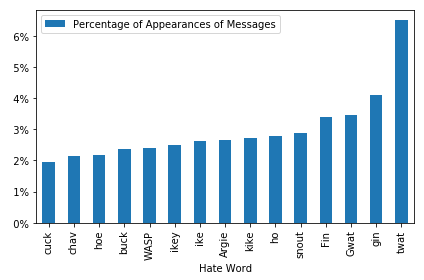

In [30]:
'''
Graphs percentage of mentions of ____ hate word in posts


'''

#print totalNumberofWords
#print frequency

#TODO percentages + save list of hate words into file for further analysis
#Test for every word
#Create matrix where this is the message || 
#parse vector => how many words is mentioned
#counter vectorizer => ski kit learn. vocabulary is list of 1000 words
#^count how many times a word occurs
#Sum of rows
#Find which of the words occur the most


#Use pandas

df = pd.DataFrame({'words':listofHatewords, 'frequency':frequency})

#Sort 
df = df.sort_values('frequency')
#print df
print df

#Cut to top ten most popular posts
gb = df.tail(15)
print gb

#total number of words
lengthOfMessages = len(message)
#print gb

#Calculate percentage
gb["percentage"] = gb["frequency"]/lengthOfMessages
percentageList = gb['percentage'].tolist()

#print df
del gb["frequency"]

#Rename Columns
gb.columns = ["Hate Word", "Percentage of Appearances of Messages"]
print gb
#Graph percentages

ax = gb.set_index('Hate Word').plot(kind='bar')
plt.tight_layout()
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals])
im = ax
image = im.get_figure()
image.savefig(ChannelName + 'HateSpeechBar.png')



In [9]:

filename = "CentipedeCentral2018NewAllfrequenciesFinal.json"

jsonF = json.load(open(filename))

In [10]:
#Store data
frequency = []
    
for b in jsonF:
    frequency.append(b["frequency"])


In [13]:
#Percentage average
#Remove 0's
averagefreq = reduce(lambda x, y: x + y, percentageList) / 15
print averagefreq
print "Average percentage: " + str(averagefreq*100) + "%"

0.0292454515298
Average percentage: 2.92454515298%


In [ ]:
#Total Percentage

#Store data
frequency = []
messageIndexes = []
nonSorted = []
#find uniqueness
    
for b in jsonF:
    frequency.append(b["frequency"])
    messageIndexes.append(b["frequencyIndex"])

#Sort message index
for a in messageIndexes:
    for i in a:
        nonSorted.append(i)
        
sortED = list(OrderedDict.fromkeys(nonSorted))

#Total count of
hatemessagelength = len(nonSorted)
#Total percentage
print hatemessagelength/len(message)


In [8]:
import json
filename = "CentipedeCentral2018Allfrequencies20180123-162148.json"

jsonF = json.load(open(filename))
import itertools
from __future__ import division
#Store data
frequency = []
messageIndexes = []
nonSorted = []
#find uniqueness
    
for b in jsonF:
    frequency.append(b["frequency"])
    messageIndexes.append(b["frequencyIndex"])
#print messageIndexes
messageIndexes.sort()
neatIndexes = list(messageIndexes for messageIndexes,_ in itertools.groupby(messageIndexes))
print len(neatIndexes)
percentage = (len(neatIndexes)/26126)*100
print percentage

495
1.89466431907
